#In this project we are classifiey images with CIFAR100 dataset

###This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).


In [ ]:
# Importing Liabaries
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense ,Flatten , Dropout
from keras.layers import Conv2D , MaxPool2D
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-100 data
from keras.datasets import cifar100 

In [ ]:
# Split the dataset
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

In [ ]:
print(X_train.shape)

(50000, 32, 32, 3)


In [ ]:
# Determine shape of the data
img_width , img_height , img_num_channels=32 ,32, 3

In [ ]:
input_shape=(img_width , img_height , img_num_channels)

In [ ]:
# Parse numbers as floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# Normalize data
X_train=X_train/255
X_test=X_test/255

num_classes=100

In [ ]:
# Create the model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# Fit data to model
history=model.fit(X_train , y_train , batch_size=50 , epochs=50, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 12s 292us/step - loss: 4.2274 - accuracy: 0.0458 - val_loss: 3.8701 - val_accuracy: 0.0984
Epoch 2/50
40000/40000 [==============================] - 5s 135us/step - loss: 3.6983 - accuracy: 0.1257 - val_loss: 3.4494 - val_accuracy: 0.1778
Epoch 3/50
40000/40000 [==============================] - 5s 136us/step - loss: 3.3984 - accuracy: 0.1803 - val_loss: 3.2315 - val_accuracy: 0.2158
Epoch 4/50
40000/40000 [==============================] - 5s 135us/step - loss: 3.2130 - accuracy: 0.2157 - val_loss: 3.0783 - val_accuracy: 0.2378
Epoch 5/50
40000/40000 [==============================] - 5s 133us/step - loss: 3.0836 - accuracy: 0.2383 - val_loss: 2.9938 - val_accuracy: 0.2517
Epoch 6/50
40000/40000 [==============================] - 5s 131us/step - loss: 2.9761 - accuracy: 0.2594 - val_loss: 2.9008 - val_accuracy: 0.2740
Epoch 7/50
40000/40000 [==============================] - 5s 

In [ ]:
# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.4224893005371095 / Test accuracy: 0.3896999955177307


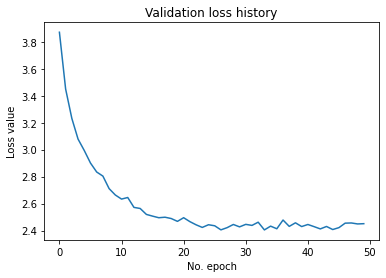

In [ ]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

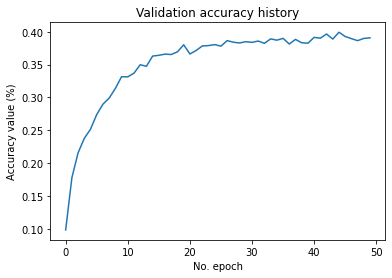

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()
